### LLM Validation - GPT-4

In [1]:
from openai import OpenAI
import pandas as pd

In [ ]:
client = OpenAI(
    api_key=""
)

In [25]:
def label_abstract(x):
    prompt = f'''I will paste an abstract from a research article. I want you
            to respond "1" if the abstract comes from a paper in the computer science field, and "0"
            if it doesn't or if you are not sure. Do not include anything else in your response; just
            the number. Please classify this abstract: {x}'''    
    chat_completion = client.chat.completions.create(
      model="gpt-4",
      messages=[
            {
                "role": "user",
                "content": prompt,
            }
      ]
    )
    return int(chat_completion.choices[0].message.content)

**Import data and run the model**:

In [4]:
df = pd.read_csv("data/text-classification-train.csv")
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [5]:
df_labeled = pd.DataFrame()
df_labeled["abstract"] = df["ABSTRACT"][:200]
df_labeled["CS_actual"] = df["Computer Science"][:200]
df_labeled

,abstract,CS_actual
0,Predictive models allow subject-specific inf...,1
1,Rotation invariance and translation invarian...,1
2,We introduce and develop the notion of spher...,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0
4,Fourier-transform infra-red (FTIR) spectra o...,1
...,...,...
195,We relate the concepts used in decentralized...,0
196,Time-varying network topologies can deeply i...,1
197,A long-standing obstacle to progress in deep...,1
198,We study the band structure topology and eng...,0


In [16]:
label_abstract(df_labeled.iloc[0]["abstract"])

1

In [19]:
# Chunk 1 (test)
df_labeled['GPT4_CS'][:5] = df_labeled['abstract'][:5].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_22640\2186721795.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_labeled['GPT4_CS'][:5] = df_labeled['abstract'][:5].apply(label_abstract)
C:\Users\aharve\AppData\Local\Temp\ipykernel_22640

In [21]:
df_labeled['GPT4_CS'][5:50] = df_labeled['abstract'][5:50].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_22640\2063383414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['GPT4_CS'][5:50] = df_labeled['abstract'][5:50].apply(label_abstract)


In [26]:
df_labeled['GPT4_CS'][50:100] = df_labeled['abstract'][50:100].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_22640\521264393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['GPT4_CS'][50:100] = df_labeled['abstract'][50:100].apply(label_abstract)


In [27]:
df_labeled['GPT4_CS'][150:200] = df_labeled['abstract'][150:200].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_22640\1260112537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['GPT4_CS'][150:200] = df_labeled['abstract'][150:200].apply(label_abstract)


In [29]:
df_labeled['GPT4_CS'][100:150] = df_labeled['abstract'][100:150].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_22640\390680060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['GPT4_CS'][100:150] = df_labeled['abstract'][100:150].apply(label_abstract)


In [30]:
df_labeled.to_csv("GPT4_experiment.csv")

**Evaluating GPT-4**

In [31]:
df_labeled = pd.read_csv("data/GPT4_experiment.csv")
df_labeled.head()

,abstract,CS_actual,GPT4_CS
0,Predictive models allow subject-specific inf...,1,1
1,Rotation invariance and translation invarian...,1,1
2,We introduce and develop the notion of spher...,0,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0,1
4,Fourier-transform infra-red (FTIR) spectra o...,1,1


<Axes: >

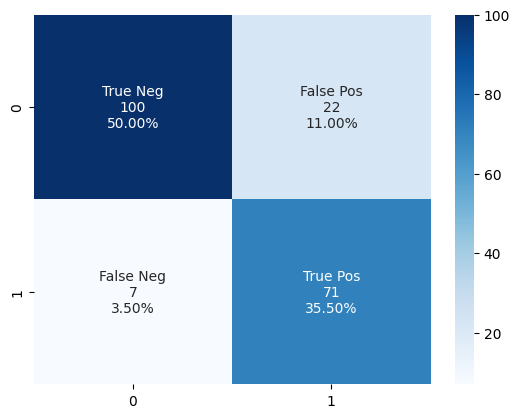

In [32]:
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(df_labeled['CS_actual'], df_labeled['GPT4_CS'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [33]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Accuracy: the percent of correctly classified data
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.855

In [34]:
# Precision: positive predictive value; of those predicted as CS documents, how many were actually CS documents?
precision = (tp)/(tp+fp)
precision

0.7634408602150538

In [35]:
# Recall: of those that were actually CS documents, how many were predicted as CS documents?
recall = (tp)/(tp+fn)
recall

0.9102564102564102

In [36]:
# F1 score: tries to balance precision and recall, with uneven class distribution (large number of actual negs)
f1 = 2*((precision*recall)/(precision+recall))
f1

0.8304093567251462

GPT-4 performs worse than Llama 3 70B on every metric. 4 percentage points lower in accuracy, 8 points lower in precision, 2 points lower in recall, and 0.4 less for the F1-score. Still much better than GPT 3.5 Turbo, and slightly better than Llama 3 8B with in-context learning.